## Classificador

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,precision_score, recall_score,f1_score, precision_recall_curve

In [3]:
X,y = mnist["data"],mnist['target']

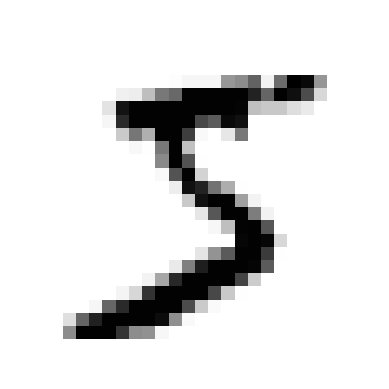

'5'

In [4]:
some_digit = np.array(X[:1])
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap="Grays")
plt.axis("off")
plt.show()
y[0]

In [5]:
y = y.astype(np.uint8)

In [6]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:0],y[:60000],y[60000:0]
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

sgd_cfl = SGDClassifier(random_state=42)
sgd_cfl.fit(X_train,y_train_5)
sgd_cfl.predict(X[:1])

array([ True])

In [8]:
cross_val_score(sgd_cfl,X_train,y_train_5,cv=3,scoring="accuracy")
y_train_pred = cross_val_predict(sgd_cfl,X_train,y_train_5,cv=3)
print(confusion_matrix(y_train_5,y_train_pred))
print(precision_score(y_train_5,y_train_pred))
print(recall_score(y_train_5,y_train_pred))
print(f1_score(y_train_5,y_train_pred))


[[53892   687]
 [ 1891  3530]]
0.8370879772350012
0.6511713705958311
0.7325171197343847


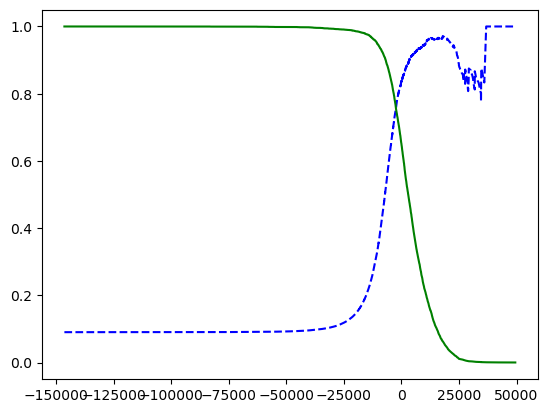

In [12]:
y_scores = cross_val_predict(sgd_cfl, X_train, y_train_5, cv=3, method="decision_function")
precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)


def plot_precision_recall_vs_th(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g-", label="Recall")
plot_precision_recall_vs_th(precisions,recalls,thresholds)
plt.show()

## Validação cruzada na unha 

In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=10,random_state=42, shuffle=True)
for train_index, test_index in skfolds.split(X_train,y_train_5):
    clone_cfl = clone(sgd_cfl)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_5.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train_5.iloc[test_index]
    clone_cfl.fit(X_train_folds,y_train_folds)
    y_pred = clone_cfl.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))
    

0.9646666666666667
0.9633333333333334
0.9703333333333334
0.9521666666666667
0.9518333333333333
0.9601666666666666
0.9728333333333333
0.9676666666666667
0.9661666666666666
0.9665


# Curva ROC

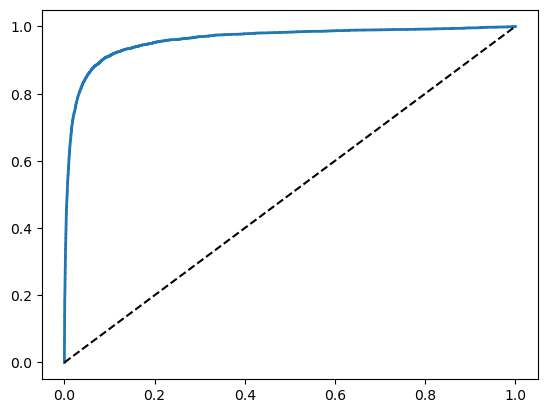

In [14]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)


def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
plot_roc_curve(fpr,tpr)
plt.show()

In [15]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

# Treinando um RFC e comparando

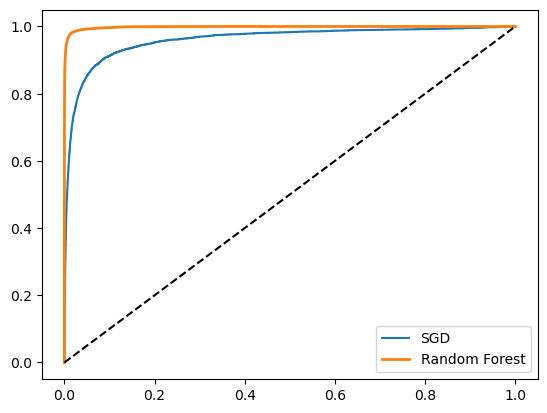

0.9983436731328145

In [16]:
from sklearn.ensemble import RandomForestClassifier
forest_elf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_elf,X_train,y_train_5,cv=3,method='predict_proba')

y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

plt.plot(fpr,tpr,label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.legend(loc="lower right")
plt.show()

roc_auc_score(y_train_5,y_scores_forest)

In [17]:
cross_val_score(forest_elf,X_train,y_train_5,cv=3,scoring="accuracy")
y_train_pred = cross_val_predict(forest_elf,X_train,y_train_5,cv=3)
print(confusion_matrix(y_train_5,y_train_pred))
print(precision_score(y_train_5,y_train_pred))
print(recall_score(y_train_5,y_train_pred))
print(f1_score(y_train_5,y_train_pred))

[[54534    45]
 [  725  4696]]
0.9905083315756169
0.8662608374838591
0.9242275142688448
